In [1]:
import pandas as pd

In [76]:
titles_df = pd.read_csv('data/titles 1 of 2.csv')

In [77]:
titles_df.shape

(5850, 15)

In [78]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [79]:
titles_df.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [80]:
titles_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [81]:
titles_df.isnull().sum().sort_values()

id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
title                      1
description               18
tmdb_popularity           91
tmdb_score               311
imdb_id                  403
imdb_score               482
imdb_votes               498
age_certification       2619
seasons                 3744
dtype: int64

In [82]:
titles_df.dropna(subset=['title'], inplace=True)

In [83]:
titles_df.isnull().sum().sort_values()

id                         0
title                      0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
description               17
tmdb_popularity           90
tmdb_score               310
imdb_id                  403
imdb_score               481
imdb_votes               497
age_certification       2618
seasons                 3743
dtype: int64

In [84]:
titles_df.duplicated('id').sum()

0

In [85]:
titles_df.duplicated('title').sum()

51

In [86]:
titles_df[titles_df.duplicated('title')]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
294,tm78067,The Girl Next Door,MOVIE,In a quiet suburban town in the summer of 1958...,2007,R,91,"['crime', 'drama', 'horror', 'thriller']",['US'],NaN,tt0830558,6.5,26293.0,13.131,6.700
304,tm102337,A Nightmare on Elm Street,MOVIE,The film that brings back horror icon Freddy K...,2010,R,95,"['horror', 'thriller', 'crime', 'drama']",['US'],NaN,tt1179056,5.2,99894.0,39.672,5.500
513,tm54147,Dostana,MOVIE,Two straight guys who pretend to be a gay coup...,2008,PG-13,142,"['drama', 'romance', 'comedy']","['IN', 'US']",NaN,tt1185420,6.5,15063.0,8.613,6.200
515,ts19384,A Lion in the House,SHOW,Five families struggle with the ups and downs ...,2006,TV-14,190,['documentation'],['US'],1.0,NaN,NaN,NaN,1.487,7.500
1208,tm209987,Christine,MOVIE,"In the 1970s, a television reporter Christine ...",2016,R,123,['drama'],['US'],NaN,tt4666726,6.9,15146.0,11.100,6.800
1232,ts42655,Wanted,SHOW,"Two complete strangers, Lola and Chelsea, inte...",2016,TV-14,45,"['crime', 'drama', 'action']",['AU'],3.0,tt5193358,7.6,5920.0,12.755,7.200
1290,ts37779,Danger Mouse,SHOW,"Danger Mouse is back saving London, saving the...",2015,NaN,12,"['comedy', 'action', 'crime', 'family', 'fanta...",['GB'],2.0,tt4196822,7.2,587.0,6.326,7.600
1380,tm248010,Taxi Driver,MOVIE,A small-town mechanic turned chauffeur for the...,2015,NaN,100,"['comedy', 'crime', 'drama']",['NG'],NaN,tt5112438,6.0,69.0,1.191,5.300
1459,tm232710,A Second Chance,MOVIE,"Popoy and Basha have had a wonderful wedding, ...",2015,NaN,130,"['drama', 'romance', 'family', 'documentation'...",['PH'],NaN,tt5226380,8.6,47.0,2.752,7.100
1557,tm244577,Love O2O,MOVIE,What is it that makes a man fall in love with ...,2016,NaN,105,"['comedy', 'romance', 'drama']",['CN'],NaN,tt6093452,6.4,1039.0,7.811,6.900


I don't need to delete duplicate titles anymore because I am not merging with date added dataset and these titles with same name can be easily identified with the id.

titles_clean_df = titles_df.sort_values(by=['title', 'release_year'])
titles_clean_df.drop_duplicates(subset='title', keep='last', inplace=True)
titles_clean_df

In [87]:
titles_df.loc[4,:]['production_countries']

"['GB', 'US']"

In [88]:
values = titles_df['production_countries'].apply(eval).values
country_set = set()
country_list = list()

for i in values:
    for c in i:
        country_set.add(c)
        country_list.append(c)

country_dict = {key: 0 for key in country_set}
for i in country_dict.keys():
    count = 0
    for j in country_list:
        if i == j:
            count +=1
            country_dict[i] = count

sorted_country_counts = sorted(country_dict.items(), key=lambda x: x[1], reverse=True)
for country, count in sorted_country_counts[:]:
    print(f'{country}: {count}')
        

US: 2323
IN: 622
GB: 404
JP: 287
FR: 248
KR: 228
CA: 219
ES: 211
DE: 139
MX: 126
BR: 102
CN: 102
PH: 86
TR: 84
AU: 84
IT: 83
NG: 73
AR: 72
TW: 64
ID: 63
EG: 49
BE: 49
CO: 48
ZA: 48
PL: 45
LB: 39
NL: 39
HK: 37
TH: 36
DK: 31
SG: 28
SE: 26
NO: 23
XX: 23
PS: 22
AE: 21
CL: 20
MY: 19
IL: 18
IE: 16
RU: 15
SA: 14
CH: 14
AT: 13
QA: 12
PE: 12
NZ: 11
CZ: 10
IS: 10
BG: 9
KW: 8
UY: 7
LU: 7
RO: 7
HU: 7
JO: 6
FI: 6
MA: 5
PT: 5
UA: 5
GH: 4
TZ: 4
TN: 4
KE: 3
PR: 3
KH: 3
SY: 3
IO: 3
GR: 3
VN: 3
BD: 3
PK: 3
LT: 2
CD: 2
AL: 2
RS: 2
IQ: 2
MT: 2
SU: 2
AF: 2
SN: 2
CM: 2
IR: 2
GE: 2
GT: 1
KG: 1
BF: 1
Lebanon: 1
NP: 1
LK: 1
ZW: 1
DZ: 1
PY: 1
MU: 1
BS: 1
GL: 1
HR: 1
CU: 1
VE: 1
AO: 1
MW: 1
VA: 1
NA: 1
KN: 1
FO: 1
MC: 1
CY: 1
BY: 1
BT: 1


In [89]:
country_dict

{'QA': 12,
 'DE': 139,
 'ES': 211,
 'CO': 48,
 'KE': 3,
 'GT': 1,
 'KG': 1,
 'BR': 102,
 'HK': 37,
 'BF': 1,
 'PE': 12,
 'UY': 7,
 'LT': 2,
 'GH': 4,
 'Lebanon': 1,
 'EG': 49,
 'FR': 248,
 'RU': 15,
 'PR': 3,
 'KH': 3,
 'NP': 1,
 'BE': 49,
 'NO': 23,
 'LU': 7,
 'LK': 1,
 'US': 2323,
 'TZ': 4,
 'CD': 2,
 'JO': 6,
 'BG': 9,
 'PS': 22,
 'IE': 16,
 'TH': 36,
 'AL': 2,
 'SY': 3,
 'SA': 14,
 'CA': 219,
 'MA': 5,
 'PL': 45,
 'RS': 2,
 'PT': 5,
 'AR': 72,
 'ZW': 1,
 'IO': 3,
 'DZ': 1,
 'IN': 622,
 'LB': 39,
 'PY': 1,
 'MU': 1,
 'BS': 1,
 'IQ': 2,
 'SG': 28,
 'GL': 1,
 'ID': 63,
 'TN': 4,
 'DK': 31,
 'XX': 23,
 'RO': 7,
 'HR': 1,
 'TR': 84,
 'PH': 86,
 'CU': 1,
 'NL': 39,
 'GB': 404,
 'VE': 1,
 'AO': 1,
 'FI': 6,
 'MW': 1,
 'NG': 73,
 'SE': 26,
 'MY': 19,
 'AT': 13,
 'CL': 20,
 'TW': 64,
 'VA': 1,
 'JP': 287,
 'MT': 2,
 'UA': 5,
 'SU': 2,
 'GR': 3,
 'NA': 1,
 'IT': 83,
 'CH': 14,
 'KN': 1,
 'ZA': 48,
 'AF': 2,
 'MX': 126,
 'VN': 3,
 'AE': 21,
 'CN': 102,
 'KR': 228,
 'NZ': 11,
 'BD': 3,
 'FO': 

In [90]:
sorted_country_counts

[('US', 2323),
 ('IN', 622),
 ('GB', 404),
 ('JP', 287),
 ('FR', 248),
 ('KR', 228),
 ('CA', 219),
 ('ES', 211),
 ('DE', 139),
 ('MX', 126),
 ('BR', 102),
 ('CN', 102),
 ('PH', 86),
 ('TR', 84),
 ('AU', 84),
 ('IT', 83),
 ('NG', 73),
 ('AR', 72),
 ('TW', 64),
 ('ID', 63),
 ('EG', 49),
 ('BE', 49),
 ('CO', 48),
 ('ZA', 48),
 ('PL', 45),
 ('LB', 39),
 ('NL', 39),
 ('HK', 37),
 ('TH', 36),
 ('DK', 31),
 ('SG', 28),
 ('SE', 26),
 ('NO', 23),
 ('XX', 23),
 ('PS', 22),
 ('AE', 21),
 ('CL', 20),
 ('MY', 19),
 ('IL', 18),
 ('IE', 16),
 ('RU', 15),
 ('SA', 14),
 ('CH', 14),
 ('AT', 13),
 ('QA', 12),
 ('PE', 12),
 ('NZ', 11),
 ('CZ', 10),
 ('IS', 10),
 ('BG', 9),
 ('KW', 8),
 ('UY', 7),
 ('LU', 7),
 ('RO', 7),
 ('HU', 7),
 ('JO', 6),
 ('FI', 6),
 ('MA', 5),
 ('PT', 5),
 ('UA', 5),
 ('GH', 4),
 ('TZ', 4),
 ('TN', 4),
 ('KE', 3),
 ('PR', 3),
 ('KH', 3),
 ('SY', 3),
 ('IO', 3),
 ('GR', 3),
 ('VN', 3),
 ('BD', 3),
 ('PK', 3),
 ('LT', 2),
 ('CD', 2),
 ('AL', 2),
 ('RS', 2),
 ('IQ', 2),
 ('MT', 2),
 (

In [91]:
country_to_continent = {
    'US': 'North America', 'CA': 'North America', 'IN': 'Asia', 'GB': 'Europe', 'JP': 'Asia',
    'FR': 'Europe', 'KR': 'Asia', 'ES': 'Europe', 'DE': 'Europe', 'MX': 'North America',
    'BR': 'South America', 'CN': 'Asia', 'PH': 'Asia', 'TR': 'Asia', 'AU': 'Oceania',
    'IT': 'Europe', 'NG': 'Africa', 'AR': 'South America', 'TW': 'Asia', 'ID': 'Asia',
    'EG': 'Africa', 'BE': 'Europe', 'ZA': 'Africa', 'CO': 'South America', 'PL': 'Europe',
    'LB': 'Asia', 'NL': 'Europe', 'HK': 'Asia', 'TH': 'Asia', 'DK': 'Europe', 'SG': 'Asia',
    'SE': 'Europe', 'XX': 'Unknown', 'NO': 'Europe', 'PS': 'Asia', 'AE': 'Asia', 'CL': 'South America',
    'MY': 'Asia', 'IL': 'Asia', 'IE': 'Europe', 'RU': 'Europe', 'CH': 'Europe', 'SA': 'Asia',
    'AT': 'Europe', 'PE': 'South America', 'QA': 'Asia', 'NZ': 'Oceania', 'CZ': 'Europe',
    'IS': 'Europe', 'BG': 'Europe', 'KW': 'Asia', 'LU': 'Europe', 'HU': 'Europe', 'UY': 'South America',
    'RO': 'Europe', 'JO': 'Asia', 'FI': 'Europe', 'UA': 'Europe', 'MA': 'Africa', 'PT': 'Europe',
    'TZ': 'Africa', 'GH': 'Africa', 'TN': 'Africa', 'PR': 'North America', 'SY': 'Asia',
    'PK': 'Asia', 'KE': 'Africa', 'VN': 'Asia', 'BD': 'Asia', 'GR': 'Europe', 'IO': 'Asia',
    'KH': 'Asia', 'GE': 'Europe', 'LT': 'Europe', 'AL': 'Europe', 'IQ': 'Asia', 'SU': 'Europe',
    'AF': 'Asia', 'IR': 'Asia', 'RS': 'Europe', 'CD': 'Africa', 'CM': 'Africa', 'SN': 'Africa',
    'MT': 'Europe', 'BT': 'Asia', 'NP': 'Asia', 'VA': 'Europe', 'VE': 'South America',
    'LK': 'Asia', 'BF': 'Africa', 'CU': 'North America', 'GT': 'North America', 'HR': 'Europe',
    'GL': 'North America', 'KN': 'North America', 'MU': 'Africa', 'AO': 'Africa', 'BY': 'Europe',
    'ZW': 'Africa', 'MW': 'Africa', 'Lebanon': 'Asia', 'FO': 'Europe', 'NA': 'Africa',
    'BS': 'North America', 'PY': 'South America', 'KG': 'Asia', 'DZ': 'Africa', 'MC': 'Europe',
    'CY': 'Europe'
}
def map_to_continent(countries):
    continents = set()
    for country in countries:
        continent = country_to_continent.get(country, 'Unknown')
        continents.add(continent)
    return list(continents)

# Apply the function and create new columns for continents
titles_df['production_countries'] = titles_df['production_countries'].apply(eval)
titles_df['continents'] = titles_df['production_countries'].apply(map_to_continent)

# Expand continents into separate columns with binary indicators
continent_dummies = titles_df['continents'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
titles_df = titles_df.drop('continents', axis=1).join(continent_dummies)

titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],[US],1.0,NaN,NaN,NaN,0.600,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",[US],NaN,tt0075314,8.2,808582.0,40.965,8.179,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",[US],NaN,tt0068473,7.7,107673.0,10.010,7.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",[GB],NaN,tt0071853,8.2,534486.0,15.461,7.811,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","[GB, US]",NaN,tt0061578,7.7,72662.0,20.398,7.600,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",[NG],NaN,tt13857480,6.8,45.0,1.466,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],[CO],NaN,tt14585902,3.8,68.0,26.005,6.300,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,NaN,NaN,NaN,1.296,10.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
country_to_continent = {
    'US': 'North America', 'CA': 'North America', 'IN': 'Asia', 'GB': 'Europe', 'JP': 'Asia',
    'FR': 'Europe', 'KR': 'Asia', 'ES': 'Europe', 'DE': 'Europe', 'MX': 'North America',
    'BR': 'South America', 'CN': 'Asia', 'PH': 'Asia', 'TR': 'Asia', 'AU': 'Oceania',
    'IT': 'Europe', 'NG': 'Africa', 'AR': 'South America', 'TW': 'Asia', 'ID': 'Asia',
    'EG': 'Africa', 'BE': 'Europe', 'ZA': 'Africa', 'CO': 'South America', 'PL': 'Europe',
    'LB': 'Asia', 'NL': 'Europe', 'HK': 'Asia', 'TH': 'Asia', 'DK': 'Europe', 'SG': 'Asia',
    'SE': 'Europe', 'XX': 'Unknown', 'NO': 'Europe', 'PS': 'Asia', 'AE': 'Asia', 'CL': 'South America',
    'MY': 'Asia', 'IL': 'Asia', 'IE': 'Europe', 'RU': 'Europe', 'CH': 'Europe', 'SA': 'Asia',
    'AT': 'Europe', 'PE': 'South America', 'QA': 'Asia', 'NZ': 'Oceania', 'CZ': 'Europe',
    'IS': 'Europe', 'BG': 'Europe', 'KW': 'Asia', 'LU': 'Europe', 'HU': 'Europe', 'UY': 'South America',
    'RO': 'Europe', 'JO': 'Asia', 'FI': 'Europe', 'UA': 'Europe', 'MA': 'Africa', 'PT': 'Europe',
    'TZ': 'Africa', 'GH': 'Africa', 'TN': 'Africa', 'PR': 'North America', 'SY': 'Asia',
    'PK': 'Asia', 'KE': 'Africa', 'VN': 'Asia', 'BD': 'Asia', 'GR': 'Europe', 'IO': 'Asia',
    'KH': 'Asia', 'GE': 'Europe', 'LT': 'Europe', 'AL': 'Europe', 'IQ': 'Asia', 'SU': 'Europe',
    'AF': 'Asia', 'IR': 'Asia', 'RS': 'Europe', 'CD': 'Africa', 'CM': 'Africa', 'SN': 'Africa',
    'MT': 'Europe', 'BT': 'Asia', 'NP': 'Asia', 'VA': 'Europe', 'VE': 'South America',
    'LK': 'Asia', 'BF': 'Africa', 'CU': 'North America', 'GT': 'North America', 'HR': 'Europe',
    'GL': 'North America', 'KN': 'North America', 'MU': 'Africa', 'AO': 'Africa', 'BY': 'Europe',
    'ZW': 'Africa', 'MW': 'Africa', 'Lebanon': 'Asia', 'FO': 'Europe', 'NA': 'Africa',
    'BS': 'North America', 'PY': 'South America', 'KG': 'Asia', 'DZ': 'Africa', 'MC': 'Europe',
    'CY': 'Europe'
}

titles_df['production_countries'] = titles_df['production_countries'].astype(str)
titles_df['production_countries'] = titles_df['production_countries'].apply(eval)
titles_exploded = titles_df.explode('production_countries')


titles_exploded['continent'] = titles_exploded['production_countries'].map(country_to_continent)
titles_exploded['continent'] = titles_exploded['continent'].fillna('Unknown continent')


titles_continents = titles_exploded.groupby('id')['continent'].apply(lambda x: ', '.join(x))


titles_df = titles_df.merge(titles_continents, on='id', how='left')

titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],[US],1.0,NaN,NaN,NaN,0.600,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",[US],NaN,tt0075314,8.2,808582.0,40.965,8.179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",[US],NaN,tt0068473,7.7,107673.0,10.010,7.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",[GB],NaN,tt0071853,8.2,534486.0,15.461,7.811,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","[GB, US]",NaN,tt0061578,7.7,72662.0,20.398,7.600,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Europe, North America"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",[NG],NaN,tt13857480,6.8,45.0,1.466,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Africa
5845,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent
5846,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],[CO],NaN,tt14585902,3.8,68.0,26.005,6.300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,South America
5847,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,NaN,NaN,NaN,1.296,10.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America


In [93]:
titles_df['continent'].value_counts()

continent
North America                                                          2165
Asia                                                                   1596
Europe                                                                  783
Unknown continent                                                       228
South America                                                           201
                                                                       ... 
North America, North America, Europe, Asia                                1
Europe, Europe, Europe, North America                                     1
North America, Europe, North America, Europe, Europe, North America       1
Asia, Europe, Asia, Asia, Asia, Asia                                      1
Africa, Asia, Africa, Africa, Asia                                        1
Name: count, Length: 128, dtype: int64

In [94]:
titles_df['continent_list'] = titles_df['continent'].str.split(',')

In [96]:
titles_df['is_international'] = titles_df['continent_list'].apply(lambda x: len(set(x)) > 1)
titles_df['is_international']

0       False
1       False
2       False
3       False
4        True
        ...  
5844    False
5845    False
5846    False
5847    False
5848    False
Name: is_international, Length: 5849, dtype: bool

In [97]:
titles_df['first_continent'] = titles_df['continent_list'].apply(lambda x: x[0] if len(set(x)) == 1 else 'international')

I used this when I was assigning first in the list as the first continent.

titles_df['first_continent'] = titles_df['continent'].str.split(',').str[0]

In [98]:
titles_df['first_continent'].value_counts()

first_continent
North America        2165
Asia                 1596
Europe                783
international         631
Unknown continent     228
South America         201
Africa                152
Oceania                70
Unknown                23
Name: count, dtype: int64

In [99]:
titles_df['first_continent'] = titles_df['first_continent'].replace('Unknown continent', 'Unknown')

In [100]:
titles_df['first_continent'].value_counts()

first_continent
North America    2165
Asia             1596
Europe            783
international     631
Unknown           251
South America     201
Africa            152
Oceania            70
Name: count, dtype: int64

In [101]:
titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],[US],1.0,NaN,NaN,NaN,0.600,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",[US],NaN,tt0075314,8.2,808582.0,40.965,8.179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",[US],NaN,tt0068473,7.7,107673.0,10.010,7.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",[GB],NaN,tt0071853,8.2,534486.0,15.461,7.811,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,[Europe],False,Europe
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","[GB, US]",NaN,tt0061578,7.7,72662.0,20.398,7.600,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Europe, North America","[Europe, North America]",True,international
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",[NG],NaN,tt13857480,6.8,45.0,1.466,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Africa,[Africa],False,Africa
5845,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown
5846,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],[CO],NaN,tt14585902,3.8,68.0,26.005,6.300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,South America,[South America],False,South America
5847,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,NaN,NaN,NaN,1.296,10.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America


In [102]:
continent_sums = continent_dummies.sum()
continent_sums

North America    2571.0
Europe           1209.0
Africa            198.0
Asia             1763.0
South America     250.0
Oceania            94.0
Unknown            23.0
dtype: float64

In [103]:
titles_df.loc[4,:]['genres']

"['war', 'action']"

In [104]:
values1 = titles_df['genres'].apply(eval).values
genre_set = set()
genre_list = list()

for i in values1:
    for c in i:
        genre_set.add(c)
        genre_list.append(c)

genre_dict = {key: 0 for key in genre_set}
for i in genre_dict.keys():
    count = 0
    for j in genre_list:
        if i == j:
            count +=1
            genre_dict[i] = count

sorted_genre_counts = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)
for genre, count in sorted_genre_counts[:]:
    print(f'{genre}: {count}')

drama: 2968
comedy: 2325
thriller: 1228
action: 1157
romance: 971
documentation: 952
crime: 936
animation: 705
family: 682
fantasy: 630
scifi: 589
european: 443
horror: 378
music: 262
history: 254
reality: 234
sport: 170
war: 163
western: 41


In [105]:
titles_df['genres'] = titles_df['genres'].apply(eval)

unique_genres = set(genre for sublist in titles_df['genres'] for genre in sublist)

genres_one_hot = titles_df['genres'].apply(lambda x: pd.Series({genre: 1 for genre in x})).fillna(0)

for genre in unique_genres:
    if genre not in genres_one_hot.columns:
        genres_one_hot[genre] = 0


In [106]:
titles_df = titles_df.join(genres_one_hot)
titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],[US],1.0,NaN,NaN,NaN,0.600,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",[US],NaN,tt0075314,8.2,808582.0,40.965,8.179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",[US],NaN,tt0068473,7.7,107673.0,10.010,7.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",[GB],NaN,tt0071853,8.2,534486.0,15.461,7.811,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,[Europe],False,Europe,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","[GB, US]",NaN,tt0061578,7.7,72662.0,20.398,7.600,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Europe, North America","[Europe, North America]",True,international,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"[romance, drama]",[NG],NaN,tt13857480,6.8,45.0,1.466,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Africa,[Africa],False,Africa,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,[drama],[],NaN,tt11803618,7.7,348.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5846,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,[comedy],[CO],NaN,tt14585902,3.8,68.0,26.005,6.300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,South America,[South America],False,South America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5847,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,NaN,NaN,NaN,1.296,10.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
titles_df['genres'].value_counts()

genres
[comedy]                                             484
[documentation]                                      329
[drama]                                              328
[comedy, drama]                                      135
[drama, romance]                                     124
                                                    ... 
[drama, war, action, thriller, history, european]      1
[thriller, crime, drama, western]                      1
[drama, scifi, fantasy, horror]                        1
[horror, fantasy, thriller]                            1
[documentation, music, reality]                        1
Name: count, Length: 1726, dtype: int64

In [108]:
titles_df['first_genre'] = titles_df['genres'].apply(lambda x: x[0] if x else None)

In [109]:
titles_df['first_genre'].value_counts()

first_genre
drama            1421
comedy           1305
documentation     665
thriller          377
action            365
animation         317
scifi             239
crime             238
romance           232
reality           171
horror            114
family            113
fantasy            88
music              59
war                46
history            21
western            16
sport               4
Name: count, dtype: int64

In [110]:
vote_stats = titles_df['imdb_votes'].describe(percentiles=[.25, .5, .75, .9, .95, .99])
vote_stats

count    5.352000e+03
mean     2.343938e+04
std      9.582047e+04
min      5.000000e+00
25%      5.167500e+02
50%      2.233500e+03
75%      9.494000e+03
90%      4.487280e+04
95%      1.034680e+05
99%      4.151851e+05
max      2.294231e+06
Name: imdb_votes, dtype: float64

In [111]:
imdb_stats = titles_df['imdb_score'].describe(percentiles=[.25, .5, .75, .9, .95, .99])
imdb_stats

count    5368.000000
mean        6.510861
std         1.163826
min         1.500000
25%         5.800000
50%         6.600000
75%         7.300000
90%         7.900000
95%         8.200000
99%         8.700000
max         9.600000
Name: imdb_score, dtype: float64

In [112]:
imdb_median = titles_df['imdb_score'].median()
imdb_median

6.6

In [113]:
titles_df['imdb_score'].fillna(imdb_median, inplace=True)

In [114]:
imdb_votes = titles_df['imdb_votes'].median()
imdb_votes

2233.5

In [115]:
titles_df['imdb_votes'].fillna(imdb_votes, inplace=True)

In [116]:
def adjusted_imdb_score(imdb_score, imdb_votes):
    return (imdb_score * imdb_votes) / (imdb_votes + 1)
titles_df['adjusted_imdb_score'] = titles_df.apply(lambda row: adjusted_imdb_score(row['imdb_score'], row['imdb_votes']), axis=1)

titles_df['adjusted_imdb_score'] = titles_df['adjusted_imdb_score'].round(2)

titles_df.sample(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score
3373,tm497383,Sergio,MOVIE,A sweeping drama set in the chaotic aftermath ...,2020,R,118,"[drama, history, romance, documentation]","[JO, TH, US, AL]",NaN,tt6468740,6.2,9698.0,11.893,6.7,1.0,1.0,0.0,1.0,0.0,0.0,0.0,"Asia, Asia, North America, Europe","[Asia, Asia, North America, Europe]",True,international,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,6.20
3149,ts95997,Raising Dion,SHOW,A widowed single mom discovers that her son ha...,2019,TV-G,43,"[scifi, drama]",[US],2.0,tt7826108,7.1,14799.0,33.326,7.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,scifi,7.10
2037,tm322243,Shimmer Lake,MOVIE,Shot in reverse day-by-day through a week—a lo...,2017,NaN,83,"[thriller, crime, drama, action, history, horr...","[CA, US]",NaN,tt1386691,6.3,14098.0,20.508,5.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"North America, North America","[North America, North America]",True,international,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,thriller,6.30
3876,ts214192,El Final del Paraíso,SHOW,Catalina Santana's new mission will force her ...,2019,TV-MA,50,"[drama, action]",[MX],1.0,tt10367818,5.1,221.0,105.774,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,5.08
1545,tm232832,The Lion Woman,MOVIE,"Eva Arctander is born with hypertrichosis, mea...",2016,PG-13,126,"[drama, european]","[SE, NO]",NaN,tt4677578,6.6,1410.0,17.587,6.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"Europe, Europe","[Europe, Europe]",True,international,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,6.60
1511,tm234466,Jonah,MOVIE,"During Carnival in São Paulo, a young man and ...",2016,PG,97,"[drama, thriller, romance, family]",[BR],NaN,tt7799740,5.4,230.0,3.125,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,South America,[South America],False,South America,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,drama,5.38
235,ts20604,Friday Night Lights,SHOW,The trials and triumphs of life in the small t...,2006,TV-14,43,"[drama, sport]",[US],5.0,tt0758745,8.7,65199.0,19.681,8.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,drama,8.70
4420,tm938434,All Because of You,MOVIE,"After falling for a guest, an unsuspecting hot...",2020,NaN,101,"[romance, comedy, action]",[MY],NaN,tt13106900,3.9,218.0,2.519,6.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance,3.88
4397,tm373471,90 ML,MOVIE,"Thamara, Paru, Kajal and Suganya are four frie...",2019,NaN,125,"[drama, romance, comedy]",[IN],NaN,tt8268916,3.3,577.0,1.810,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,3.29
5797,tm1099320,Convergence: Courage in a Crisis,MOVIE,Activists and volunteers work through the dark...,2021,R,113,[documentation],"[GB, US]",NaN,tt15398694,5.4,262.0,6.589,5.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Europe, North America","[Europe, North America]",True,international,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,documentation,5.38


In [117]:
titles_df[['adjusted_imdb_score', 'imdb_score']]

,adjusted_imdb_score,imdb_score
0,6.60,6.6
1,8.20,8.2
2,7.70,7.7
3,8.20,8.2
4,7.70,7.7
...,...,...
5844,6.65,6.8
5845,7.68,7.7
5846,3.74,3.8
5847,6.60,6.6


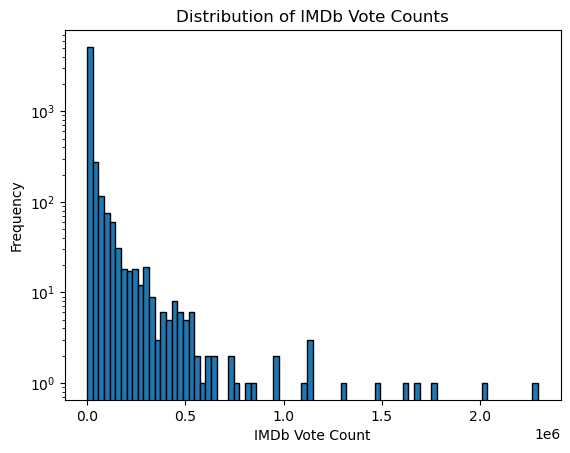

In [118]:
import matplotlib.pyplot as plt


plt.hist(titles_df['imdb_votes'], bins=80, edgecolor='k')
plt.xlabel('IMDb Vote Count')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Vote Counts')
plt.yscale('log')
plt.show()

In [119]:
value_counts = titles_df['age_certification'].value_counts()
value_counts

age_certification
TV-MA    883
R        556
TV-14    474
PG-13    451
PG       233
TV-PG    188
G        124
TV-Y7    120
TV-Y     107
TV-G      79
NC-17     16
Name: count, dtype: int64

In [120]:
titles_df.isnull().sum().sort_values()

id                         0
documentation              0
drama                      0
crime                      0
action                     0
thriller                   0
european                   0
fantasy                    0
comedy                     0
war                        0
romance                    0
western                    0
history                    0
music                      0
family                     0
horror                     0
scifi                      0
animation                  0
reality                    0
sport                      0
first_continent            0
is_international           0
continent_list             0
imdb_score                 0
title                      0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
continent                  0
imdb_votes                 0
adjusted_imdb_score        0
North America              0
Europe        

In [121]:
missing_percentage = titles_df.isnull().mean() * 100
missing_percentage

id                       0.000000
title                    0.000000
type                     0.000000
description              0.290648
release_year             0.000000
age_certification       44.759788
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 63.993845
imdb_id                  6.890067
imdb_score               0.000000
imdb_votes               0.000000
tmdb_popularity          1.538725
tmdb_score               5.300051
North America            0.000000
Europe                   0.000000
Africa                   0.000000
Asia                     0.000000
South America            0.000000
Oceania                  0.000000
Unknown                  0.000000
continent                0.000000
continent_list           0.000000
is_international         0.000000
first_continent          0.000000
documentation            0.000000
drama                    0.000000
crime                    0.000000
action        

In [122]:
tv_shows = titles_df[titles_df['type'] == 'SHOW']
missing_seasons_count = tv_shows['seasons'].isnull().sum()
tv_shows.isnull().sum()

id                        0
title                     0
type                      0
description               9
release_year              0
age_certification       255
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 141
imdb_score                0
imdb_votes                0
tmdb_popularity          29
tmdb_score              116
North America             0
Europe                    0
Africa                    0
Asia                      0
South America             0
Oceania                   0
Unknown                   0
continent                 0
continent_list            0
is_international          0
first_continent           0
documentation             0
drama                     0
crime                     0
action                    0
thriller                  0
european                  0
fantasy                   0
comedy                    0
war                       0
romance             

In [123]:
age_cert_missing = titles_df['age_certification'].isnull()
titles_df[age_cert_missing]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","[GB, US]",NaN,tt0061578,7.7,72662.0,20.398,7.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Europe, North America","[Europe, North America]",True,international,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,war,7.70
10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"[action, drama, war]","[GB, US]",NaN,tt0054953,7.5,50748.0,13.844,7.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Europe, North America","[Europe, North America]",True,international,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,action,7.50
13,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,"[romance, comedy]",[US],NaN,tt0047673,7.5,42488.0,8.915,7.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance,7.50
14,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,"[drama, crime, comedy]",[EG],NaN,tt0051390,7.5,4471.0,5.546,7.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Africa,[Africa],False,Africa,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.50
17,tm14350,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,NaN,133,[drama],[EG],NaN,tt0077751,7.2,1727.0,1.370,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Africa,[Africa],False,Africa,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],[US],NaN,NaN,6.6,2233.5,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.60
5844,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"[romance, drama]",[NG],NaN,tt13857480,6.8,45.0,1.466,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Africa,[Africa],False,Africa,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance,6.65
5845,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,[drama],[],NaN,tt11803618,7.7,348.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.68
5846,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,[comedy],[CO],NaN,tt14585902,3.8,68.0,26.005,6.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,South America,[South America],False,South America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,3.74


pd.melt(titles_df, id_vars = ['id', 'title', 'type', 'description', 'release_year', 

pd.melt(titles_df, id_vars = ['id', 'title', 'type', 'description', 'release_year', 'age_certification'
                             , 'genres', 'production_countries'])

In [124]:
def categorize_scores(row):
    if row['imdb_votes'] < 600:
        if row['adjusted_imdb_score'] >= 8.5:
            return 3
        elif row['adjusted_imdb_score'] >= 7:
            return 2
        elif row['adjusted_imdb_score'] >= 5:
            return 1
        else:
            return 1
    elif row['imdb_votes'] < 2500:
        if row['adjusted_imdb_score'] >= 8.5:
            return 3
        elif row['adjusted_imdb_score'] >= 7:
            return 2
        elif row['adjusted_imdb_score'] >= 5:
            return 1
        else:
            return 1
    elif row['imdb_votes'] < 10000:
        if row['adjusted_imdb_score'] >= 8.5:
            return 4
        elif row['adjusted_imdb_score'] >= 7:
            return 3
        elif row['adjusted_imdb_score'] >= 5:
            return 2
        else:
            return 1
    elif row['imdb_votes'] < 45000:
        if row['adjusted_imdb_score'] >= 8.5:
            return 4
        elif row['adjusted_imdb_score'] >= 7:
            return 3
        elif row['adjusted_imdb_score'] >= 5:
            return 2
        else:
            return 1
    else:
        if row['adjusted_imdb_score'] >= 8.5:
            return 4
        elif row['adjusted_imdb_score'] >= 7:
            return 3
        elif row['adjusted_imdb_score'] >= 5:
            return 2
        else:
            return 1

titles_df['score_category'] = titles_df.apply(categorize_scores, axis=1)
titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score,score_category
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],[US],1.0,NaN,6.6,2233.5,0.600,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,documentation,6.60,1
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",[US],NaN,tt0075314,8.2,808582.0,40.965,8.179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,8.20,3
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",[US],NaN,tt0068473,7.7,107673.0,10.010,7.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.70,3
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",[GB],NaN,tt0071853,8.2,534486.0,15.461,7.811,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,[Europe],False,Europe,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fantasy,8.20,3
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","[GB, US]",NaN,tt0061578,7.7,72662.0,20.398,7.600,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Europe, North America","[Europe, North America]",True,international,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,war,7.70,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"[romance, drama]",[NG],NaN,tt13857480,6.8,45.0,1.466,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Africa,[Africa],False,Africa,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance,6.65,1
5845,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,[drama],[],NaN,tt11803618,7.7,348.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.68,2
5846,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,[comedy],[CO],NaN,tt14585902,3.8,68.0,26.005,6.300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,South America,[South America],False,South America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,3.74,1
5847,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,NaN,6.6,2233.5,1.296,10.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.60,1


In [125]:
credits_df = pd.read_csv('data/credits 2 of 2.csv')

In [126]:
credits_df.shape

(77801, 5)

In [127]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [128]:
credits_df.head(5)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [129]:
credits_df.describe()

,person_id
count,7.780100e+04
mean,5.294888e+05
std,6.430167e+05
min,7.000000e+00
25%,4.530600e+04
50%,1.983580e+05
75%,8.880960e+05
max,2.462818e+06


In [130]:
credits_df.isnull().sum().sort_values()

person_id       0
id              0
name            0
role            0
character    9772
dtype: int64

In [131]:
credits_df.duplicated('id').sum()

72312

In [132]:
credits_df.set_index('id', inplace=True)

In [133]:
credits_df.reset_index(inplace=True)

In [134]:
credits_df.sample(5)

,id,person_id,name,character,role
16967,tm148671,78237,Susham Bedi,Mrs. Youness,ACTOR
62240,tm915354,1693456,Mike Lin,Tao Chih-yuan,ACTOR
48625,ts252758,1567804,Clea Shearer,Self - Host,ACTOR
7078,tm141390,19523,Danielle Panabaker,Jenna,ACTOR
70521,ts272366,24188,Lena Waithe,NaN,ACTOR


In [135]:
originals_df = pd.read_csv('data/Wiki_Netflix_Originals1.csv')

In [136]:
originals_df.shape

(361, 1)

In [137]:
originals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   361 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


In [138]:
originals_df.isnull().sum().sort_values()

title    0
dtype: int64

In [139]:
originals_df.sample(5)

,title
58,Blood of Zeus
134,Suburræterna
52,Blue Eye Samurai
186,Bandidos
87,Sonic Prime


In [140]:
titles_credits_df = pd.merge(left = titles_df, right = credits_df, how = 'left', on = 'id')
titles_credits_df.sample(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role
36372,tm344336,Burn Out,MOVIE,"Tony, a promising young motorcycle racer, is f...",2018,NaN,107,"[thriller, crime, action, european]",[FR],NaN,tt6340604,6.2,3803.0,21.048,6.800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,[Europe],False,Europe,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,thriller,6.20,2,363098.0,Alain Bellot,Man parking Holland,ACTOR
33172,tm245937,Win It All,MOVIE,A gambling addict faces a conflict when entrus...,2017,NaN,88,[comedy],[US],NaN,tt3155328,6.2,9309.0,5.181,5.700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,6.20,2,1295965.0,Brian Majcher,Poker Player,ACTOR
38810,tm426117,On My Skin,MOVIE,The incredible true story behind the most cont...,2018,NaN,100,"[drama, european]",[IT],NaN,tt7121252,7.3,9211.0,10.341,8.057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,[Europe],False,Europe,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.30,3,262601.0,Pietro Faiella,Medico - Regina Coeli,ACTOR
62768,tm683841,"Hello, Love, Goodbye",MOVIE,A bartender romances a domestic helper despite...,2019,NaN,118,"[drama, romance]","[HK, PH]",NaN,tt10156112,7.3,1050.0,9.819,6.100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"Asia, Asia","[Asia, Asia]",True,international,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.29,2,148043.0,Kakai Bautista,Sally,ACTOR
30469,tm346943,Kodachrome,MOVIE,Matt Ryder is convinced to drive his estranged...,2017,NaN,105,"[drama, comedy, european]",[US],NaN,tt1880399,6.8,16821.0,8.641,6.800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,6.80,2,446716.0,Jerry Rector,Sheriff,ACTOR


In [141]:
titles_credits_df.sample(50)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role
18794,tm148662,The Boss: Anatomy of a Crime,MOVIE,This incredibly disturbing story follows the e...,2014,NaN,98,"[drama, crime]","[VE, AR]",NaN,tt3854234,7.3,2156.0,25.309,7.800,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"South America, South America","[South America, South America]",True,international,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.30,2,163645.0,Guillermo Pfening,Marcelo Di Giovanni,ACTOR
6286,tm35463,Blow,MOVIE,A boy named George Jung grows up in a struggli...,2001,R,124,"[crime, drama]",[US],NaN,tt0221027,7.5,258431.0,24.348,7.400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,crime,7.50,3,24165.0,Kevin Gage,Leon Minghella,ACTOR
9956,tm32885,Rang De Basanti,MOVIE,After a group of friends graduate from Delhi U...,2006,PG-13,157,"[drama, history, comedy, crime]",[IN],NaN,tt0405508,8.1,118477.0,6.848,7.200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,8.10,3,14184.0,Mohan Agashe,Defence Minister Shashtri,ACTOR
38767,tm307950,Mike Birbiglia: Thank God for Jokes,MOVIE,Mike Birbiglia declares that a joke should nev...,2017,NaN,71,[comedy],[US],NaN,tt6608034,7.5,2494.0,3.804,7.400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,7.50,2,3835.0,Jimmy Kimmel,Himself,ACTOR
28413,ts42477,Babylon Berlin,SHOW,"Beneath the decadence of 1929 Berlin, lies an ...",2017,TV-MA,49,"[drama, thriller, crime, history, european]",[DE],4.0,tt4378376,8.4,23638.0,33.053,7.900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,[Europe],False,Europe,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,8.40,3,23773.0,Volker Bruch,Gereon Rath,ACTOR
29534,ts78305,Elite,SHOW,When three working class kids enroll in the mo...,2018,TV-MA,48,"[thriller, drama, crime]",[ES],5.0,tt7134908,7.4,75337.0,224.739,8.100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,[Europe],False,Europe,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,thriller,7.40,3,227354.0,Georgina Amorós,Cayetana Grajera,ACTOR
35861,tm327540,Gnome Alone,MOVIE,When Chloe discovers that her new home's garde...,2017,PG,85,"[family, action, animation, comedy, fantasy, m...","[CA, GB, US]",NaN,tt5851786,5.6,3488.0,15.668,6.200,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"North America, Europe, North America","[North America, Europe, North America]",True,international,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,family,5.60,2,8517.0,David Koechner,Zamfeer (voice),ACTOR
54205,tm461829,The Hard Way,MOVIE,After learning of his brother's death during a...,2019,NaN,94,[action],[US],NaN,tt9815714,4.8,3250.0,16.860,5.400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,action,4.80,1,251308.0,Cosmin Dominte,Paulie Zito,ACTOR
44510,tm244149,The Irishman,MOVIE,"Pennsylvania, 1956. Frank Sheeran, a war veter...",2019,R,209,"[crime, drama, history, thriller]",[US],NaN,tt1302006,7.8,376379.0,21.075,7.600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,crime,7.80,3,4149.0,Garry Pastore,Albert Anastasia,ACTOR
67200,tm983723,The Sparks Broth

In [142]:
titles_credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78161 entries, 0 to 78160
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78161 non-null  object 
 1   title                 78161 non-null  object 
 2   type                  78161 non-null  object 
 3   description           78114 non-null  object 
 4   release_year          78161 non-null  int64  
 5   age_certification     46899 non-null  object 
 6   runtime               78161 non-null  int64  
 7   genres                78161 non-null  object 
 8   production_countries  78161 non-null  object 
 9   seasons               14976 non-null  float64
 10  imdb_id               74628 non-null  object 
 11  imdb_score            78161 non-null  float64
 12  imdb_votes            78161 non-null  float64
 13  tmdb_popularity       78062 non-null  float64
 14  tmdb_score            76886 non-null  float64
 15  North America      

In [143]:
filtered = titles_credits_df['person_id'].isnull()
titles_credits_df[filtered]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],[US],1.0,NaN,6.6,2233.5,0.600000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,documentation,6.60,1,NaN,NaN,NaN,NaN
3543,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991,TV-G,18,"[documentation, family, reality]",[JP],12.0,NaN,6.6,2233.5,7.730000,7.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,documentation,6.60,1,NaN,NaN,NaN,NaN
5326,tm997728,Blade Runner: The Final Cut,MOVIE,"Visually spectacular, intensely action-packed ...",2007,R,117,"[action, thriller, scifi]",[US],NaN,NaN,6.6,2233.5,0.055091,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,action,6.60,1,NaN,NaN,NaN,NaN
8103,ts33559,Shaun the Sheep,SHOW,Shaun the Sheep thinks and acts like a person ...,2007,TV-G,7,"[animation, comedy, family, european]",[GB],6.0,tt0983983,8.1,28.0,31.375000,7.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,[Europe],False,Europe,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,animation,7.82,2,NaN,NaN,NaN,NaN
8856,ts98340,Metallica: Some Kind of Monster,SHOW,This collection includes the acclaimed rock do...,2004,TV-MA,84,[western],"[CA, US]",1.0,tt6954486,6.6,2233.5,0.893000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"North America, North America","[North America, North America]",True,international,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,western,6.60,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78117,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,NaN,25,"[animation, family]",[],NaN,tt14586752,5.6,38.0,53.762000,6.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,animation,5.46,1,NaN,NaN,NaN,NaN
78134,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],[US],NaN,NaN,6.6,2233.5,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.60,1,NaN,NaN,NaN,NaN
78147,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,[drama],[],NaN,tt11803618,7.7,348.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.68,2,NaN,NaN,NaN,NaN
78159,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,NaN,6.6,2233.5,1.296000,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.60,1,NaN,NaN,NaN,NaN


In [144]:
originals_df['is_netflix_original'] = True

titles_credits_originals_df = pd.merge(
    left=titles_credits_df, 
    right=originals_df[['title', 'is_netflix_original']], 
    how='left', 
    on='title'
)

titles_credits_originals_df['is_netflix_original'] = titles_credits_originals_df['is_netflix_original'].fillna(False)

titles_credits_originals_df.sample(50)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role,is_netflix_original
15671,tm182026,Zokkomon,MOVIE,"An orphan is abused and abandoned, believed to...",2011,PG,109,"[fantasy, drama, family, action]",[IN],NaN,tt1605790,4.0,411.0,1.927,6.800,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,fantasy,3.99,1,357209.0,Darsheel Safary,Kunal / Zokkomon,ACTOR,False
17384,tm187979,Cloudy with a Chance of Meatballs 2,MOVIE,After the disastrous food storm in the first f...,2013,PG,95,"[animation, scifi, drama, comedy, family, fant...",[US],NaN,tt1985966,6.3,102071.0,64.170,6.443,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,animation,6.30,2,13622.0,Neil Patrick Harris,Steve (voice),ACTOR,False
3665,tm117488,The Next Karate Kid,MOVIE,"Mr. Miyagi decides to take Julie, a troubled t...",1994,PG,107,"[action, drama, family, sport, romance]",[US],NaN,tt0110657,4.5,30422.0,20.185,5.318,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,action,4.50,1,31168.0,Brian Smiar,O'Connor,ACTOR,False
32099,tm217228,Death Note,MOVIE,A young man comes to possess a supernatural no...,2017,NC-17,101,"[horror, thriller, crime, fantasy, drama, action]",[US],NaN,tt1241317,4.5,84119.0,22.306,4.200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,horror,4.50,1,709390.0,DaeYoung Danny Kim,Bus Boy,ACTOR,False
32263,tm219259,Goon: Last of the Enforcers,MOVIE,"During a pro lockout, Doug ""The Thug"" Glatt is...",2017,R,101,"[comedy, sport]",[CA],NaN,tt2417712,5.8,13717.0,13.329,5.700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,comedy,5.80,2,3070.0,T. J. Miller,Sportscaster,ACTOR,False
29815,tm244206,The Meyerowitz Stories (New and Selected),MOVIE,An estranged family gathers together in New Yo...,2017,NaN,112,"[comedy, drama]",[US],NaN,tt5536736,6.9,48223.0,12.045,6.500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,6.90,2,135553.0,Gibson Frazier,Ma'itre d',ACTOR,False
7440,tm24088,Scary Movie 4,MOVIE,Cindy finds out the house she lives in is haun...,2006,PG-13,83,"[comedy, horror]",[US],NaN,tt0362120,5.1,120997.0,83.018,5.500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,comedy,5.10,2,120191.0,Amber Borycki,Dancer (uncredited),ACTOR,False
34310,tm347821,Outside In,MOVIE,An ex-con struggling to readjust to life in hi...,2018,NaN,109,[drama],[US],NaN,tt7260048,6.7,4768.0,6.488,6.232,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,6.70,2,6221.0,Ben Schwartz,Ted,ACTOR,False
53794,tm472411,Iron Fists and Kung Fu Kicks,MOVIE,The wild untold story of the iconic Shaw Broth...,2019,NaN,108,"[documentation, history]",[AU],NaN,tt9169764,6.6,1146.0,6.234,7.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Oceania,[Oceania],False,Oceania,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,documentation,6.59,1,18

In [145]:
titles_credits_originals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78161 entries, 0 to 78160
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78161 non-null  object 
 1   title                 78161 non-null  object 
 2   type                  78161 non-null  object 
 3   description           78114 non-null  object 
 4   release_year          78161 non-null  int64  
 5   age_certification     46899 non-null  object 
 6   runtime               78161 non-null  int64  
 7   genres                78161 non-null  object 
 8   production_countries  78161 non-null  object 
 9   seasons               14976 non-null  float64
 10  imdb_id               74628 non-null  object 
 11  imdb_score            78161 non-null  float64
 12  imdb_votes            78161 non-null  float64
 13  tmdb_popularity       78062 non-null  float64
 14  tmdb_score            76886 non-null  float64
 15  North America      

In [146]:
netflix_originals = titles_credits_originals_df['is_netflix_original'] == True
titles_credits_originals_df[netflix_originals]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role,is_netflix_original
2077,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"[animation, action, comedy, drama, fantasy]",[JP],21.0,tt0388629,8.8,117129.0,143.457,8.764,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,animation,8.8,4,22308.0,Mayumi Tanaka,Monkey D. Luffy (voice),ACTOR,True
2078,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"[animation, action, comedy, drama, fantasy]",[JP],21.0,tt0388629,8.8,117129.0,143.457,8.764,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,animation,8.8,4,36373.0,Kazuya Nakai,Roronoa Zoro (voice),ACTOR,True
2079,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"[animation, action, comedy, drama, fantasy]",[JP],21.0,tt0388629,8.8,117129.0,143.457,8.764,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,animation,8.8,4,58214.0,Akemi Okamura,Nami (voice),ACTOR,True
2080,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"[animation, action, comedy, drama, fantasy]",[JP],21.0,tt0388629,8.8,117129.0,143.457,8.764,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,animation,8.8,4,58215.0,Kappei Yamaguchi,Usopp (voice),ACTOR,True
2081,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"[animation, action, comedy, drama, fantasy]",[JP],21.0,tt0388629,8.8,117129.0,143.457,8.764,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,animation,8.8,4,60138.0,Hiroaki Hirata,Vinsmoke Sanji (voice),ACTOR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76849,ts241296,Finding Ola,SHOW,"After a life-altering event, Ola Abd ElSabour ...",2022,TV-14,53,"[comedy, drama]",[],1.0,tt12432642,7.5,1572.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,7.5,2,1241389.0,Mahmoud El-Lisy,NaN,ACTOR,True
76850,ts241296,Finding Ola,SHOW,"After a life-altering event, Ola Abd ElSabour ...",2022,TV-14,53,"[comedy, drama]",[],1.0,tt12432642,7.5,1572.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,7.5,2,609005.0,Nada Moussa,NaN,ACTOR,True
76851,ts241296,Finding Ola,SHOW,"After a life-altering event, Ola Abd ElSabour ...",2022,TV-14,53,"[comedy, drama]",[],1.0,tt12432642,7.5,1572.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,7.5,2,176053.0,Khaled El Nabawy,NaN,ACTOR,True
76852,ts241296,Finding Ola,SHOW,"After a life-altering event, Ola Abd ElSabour ...",2022,TV-14,53,"[comedy, drama]",[],1.0,tt12432642,7.5,1572.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [147]:
titles_credits_originals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78161 entries, 0 to 78160
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78161 non-null  object 
 1   title                 78161 non-null  object 
 2   type                  78161 non-null  object 
 3   description           78114 non-null  object 
 4   release_year          78161 non-null  int64  
 5   age_certification     46899 non-null  object 
 6   runtime               78161 non-null  int64  
 7   genres                78161 non-null  object 
 8   production_countries  78161 non-null  object 
 9   seasons               14976 non-null  float64
 10  imdb_id               74628 non-null  object 
 11  imdb_score            78161 non-null  float64
 12  imdb_votes            78161 non-null  float64
 13  tmdb_popularity       78062 non-null  float64
 14  tmdb_score            76886 non-null  float64
 15  North America      

In [148]:
titles_credits_originals_df['First_Entry_Flag'] = ~titles_credits_originals_df['id'].duplicated(keep='first')

In [149]:
titles_credits_originals_df['Sum_IMDb_Votes_First_Entry'] = titles_credits_originals_df['imdb_votes'] * titles_credits_originals_df['First_Entry_Flag']

In [150]:
pd.set_option('display.max_columns', None)
titles_credits_originals_df.sample(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role,is_netflix_original,First_Entry_Flag,Sum_IMDb_Votes_First_Entry
72259,tm983658,Rita Moreno: Just a Girl Who Decided to Go for It,MOVIE,Rita Moreno defied both her humble upbringing ...,2021,PG-13,90,[documentation],[US],NaN,tt10741846,7.7,750.0,4.916,7.100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,documentation,7.69,2,6889.0,America Ferrera,Self (archive footage),ACTOR,False,False,0.0
66260,tm525645,Fear Street: Part One - 1994,MOVIE,A circle of teenage friends accidentally encou...,2021,NaN,107,"[drama, horror, fantasy]",[US],NaN,tt6566576,6.2,77401.0,123.091,6.766,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,drama,6.20,2,683431.0,Matt Burke,Football Coach,ACTOR,False,False,0.0
77252,tm1076198,Blue Dream: The Road to Wembley,MOVIE,A docu-film that traces the victorious ride of...,2021,NaN,61,"[documentation, sport]",[IT],NaN,tt15684042,7.1,792.0,4.840,7.900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe,[Europe],False,Europe,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,documentation,7.09,2,1150050.0,Manuele Mandolesi,NaN,DIRECTOR,False,False,0.0
8127,tm78671,Cleaner,MOVIE,Single father and former cop Tom Cutler has an...,2007,R,88,"[thriller, crime]",[US],NaN,tt0896798,6.1,42285.0,11.509,6.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,thriller,6.10,2,1938705.0,Mike Guy,Priest #1,ACTOR,False,False,0.0
17700,ts20097,Hemlock Grove,SHOW,One cannot quench his all-consuming thirst. Th...,2013,TV-MA,49,"[thriller, scifi, drama, fantasy, horror]",[US],3.0,tt2309295,7.0,39998.0,22.596,7.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,thriller,7.00,3,2818.0,Famke Janssen,Olivia Godfrey,ACTOR,False,False,0.0
4100,tm8687,Sam Kinison: Family Entertainment Hour,MOVIE,Get ready to scream with laughter! Sam Kinison...,1991,NaN,49,[comedy],[US],NaN,NaN,6.6,2233.5,1.840,6.100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,6.60,1,128362.0,Malika Kinison,Herself (uncredited),ACTOR,False,False,0.0
49575,ts306090,GREAT PRETENDER,SHOW,"Supposedly Japan’s greatest swindler, Makoto E...",2020,TV-MA,23,"[drama, action, animation, comedy, crime]",[JP],1.0,tt11680468,7.9,4902.0,13.641,7.600,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,drama,7.90,3,30778.0,Junichi Suwabe,Laurent Thierry (voice),ACTOR,False,False,0.0
69596,tm1038344,Awake,MOVIE,After a sudden global event wipes out all elec...,2021,R,96,"[drama, scifi, thriller, action]",[US],NaN,tt10418662,4.9,21498.0,89.154,6.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,drama,4.90,1,1002745.0,Chai Valladares,Male Nurse,ACTOR,False,False,0.0
22895,tm135543,By the Sea,MOVIE,"Set in France during the mid-1970s, Vanessa, a...",2015,R,122,"[drama, romance, european]","[US, FR, MT]",NaN,tt3883986,5.3,20541.0,10.203,5.600,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"North Americ

In [151]:
titles_credits_originals_df.to_csv(r'C:\Users\pinar\Desktop\General Assembly Coursework to Study\Python\GitHub\Capstone Project\Netflix-Analysis\data\all_merged.csv', index = False)

In [152]:
titles_df.to_csv(r'C:\Users\pinar\Desktop\General Assembly Coursework to Study\Python\GitHub\Capstone Project\Netflix-Analysis\data\titles_with_continents.csv', index = False)